In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.io.arff import loadarff

In [18]:
df = pd.DataFrame(loadarff("../FitModel/phpMawTba.arff")[0])

def decode_utf(str):
    return str.decode("utf-8")

for feature in ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "class"]:
    df[feature] = df[feature].apply(decode_utf)
    
df = df.rename(columns={"class": "label"})
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


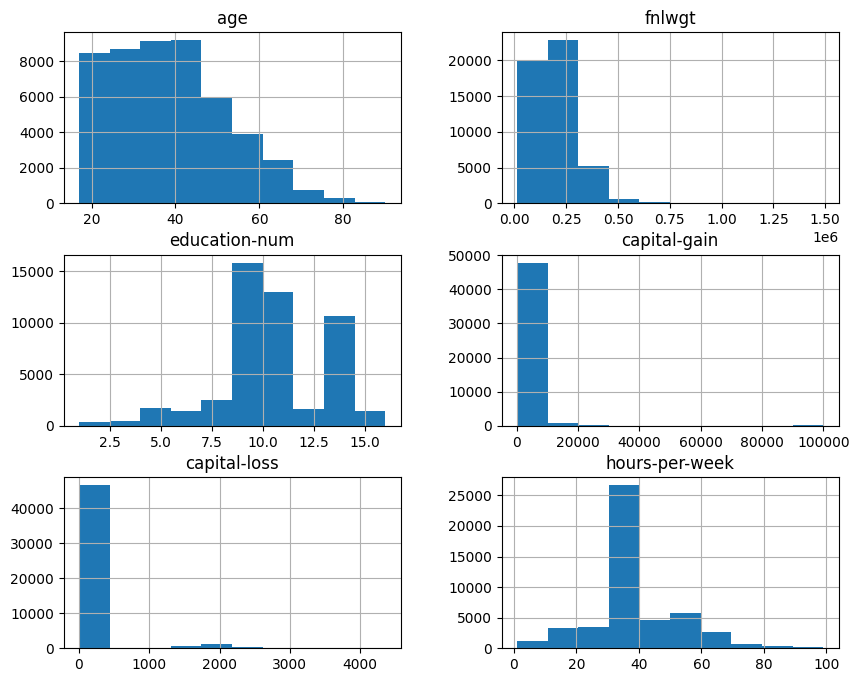

In [7]:
df.hist(figsize=(10, 8));

In [20]:
numerical_features = ["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]
categorical_features = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "class"]

features = numerical_features + categorical_features

data = df[numerical_features]
label = df.label

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC())
data_transform = model.fit(data, label)

In [30]:
df["native-country"].value_counts().sort_index()

?                               857
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        88
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          951
Nicaragua                   

In [104]:
from sklearn.compose import make_column_selector as selector

categorical_selector = selector(dtype_include="object")
categorical_columns = categorical_selector(df)

categorical_data = df[categorical_columns].drop(columns=["label"])
categorical_data.head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States
6,?,HS-grad,Never-married,?,Unmarried,Black,Male,United-States
7,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
8,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,United-States
9,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


In [41]:
print(f"Categorical data has {categorical_data.shape[1] - 1} features")

Categorical data has 8 features


In [54]:
from sklearn.preprocessing import OrdinalEncoder

edu_features = df[["education"]]
cate_encoder = OrdinalEncoder().set_output(transform="pandas")
edu_features_transform = cate_encoder.fit_transform(edu_features)

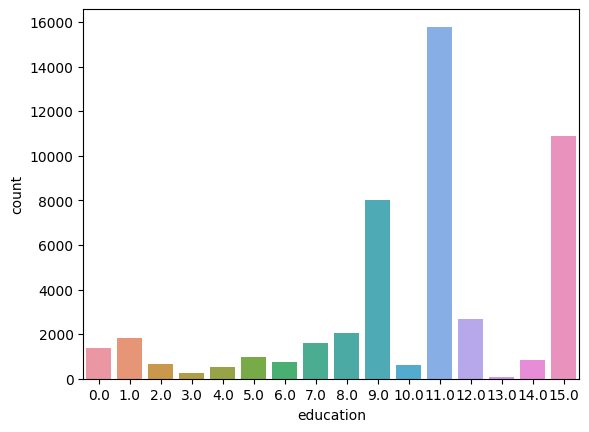

In [66]:
import seaborn as sns

sns.countplot(data=edu_features_transform, x="education");

In [73]:
print(cate_encoder.categories_[0])

['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']


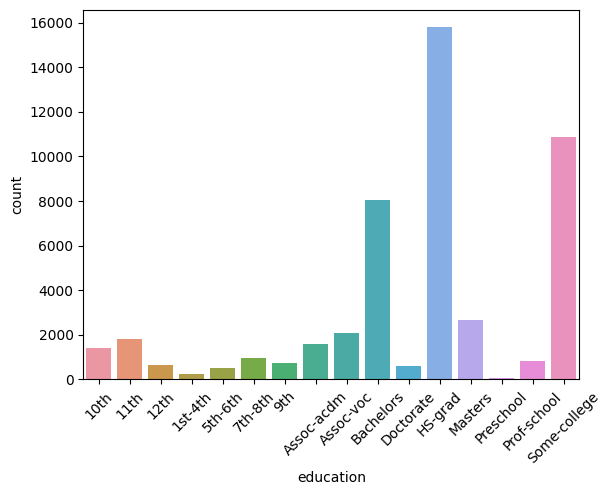

In [94]:
ax = sns.countplot(data=edu_features_transform, x="education");
ax.set_xticks(range(16), labels = cate_encoder.categories_[0], rotation=45);
# edu_features_transform

In [113]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


model = make_pipeline(OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500))

In [114]:
%%time
cv_model = cross_validate(model, categorical_data, label)
cv_model["test_score"].mean()

CPU times: total: 3 s
Wall time: 3.03 s


0.8328692091154984

In [116]:
model = make_pipeline(OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), LogisticRegression(max_iter=500))
cv_model = cross_validate(model, categorical_data, label)
cv_model["test_score"].mean()

0.7554768489536634

In [118]:
model = make_pipeline(OneHotEncoder(handle_unknown="ignore"), LogisticRegression(max_iter=500))
cv_model = cross_validate(model, categorical_data, label)
cv_model["test_score"].mean()

0.8328692091154984